# **Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt 

In [3]:
df1 = pd.read_csv("../datasets/digital_twins/train/healthy/test01_25,5hz_002.csv")
df2 = pd.read_csv("../datasets/digital_twins/train/faulty/fault_at_1/test01_25,5hz_001.csv")
df3 = pd.read_csv("../datasets/digital_twins/train/faulty/fault_at_2/test01_25,5hz_002.csv")
df4 = pd.read_csv("../datasets/digital_twins/train/faulty/fault_at_3/test01_25,5hz_003.csv")


In [4]:
def remove_phase(noisy_signal1, noisy_signal2):
    """
    Removes phase misalignment between two signals by aligning them based on cross-correlation.

    Args:
    - noisy_signal1 (numpy array): First noisy signal
    - noisy_signal2 (numpy array): Second noisy signal

    Returns:
    - numpy array: Aligned second signal with removed phase misalignment
    """

    # Calculate the cross-correlation between the two noisy signals
    corr = np.correlate(noisy_signal1, noisy_signal2, 'full')

    # Find the index of the maximum correlation value
    corr_max_idx = np.argmax(corr)

    # Roll (shift) the second noisy signal to align it based on the maximum correlation index
    noisy_signal2 = np.roll(noisy_signal2, corr_max_idx)

    return noisy_signal2


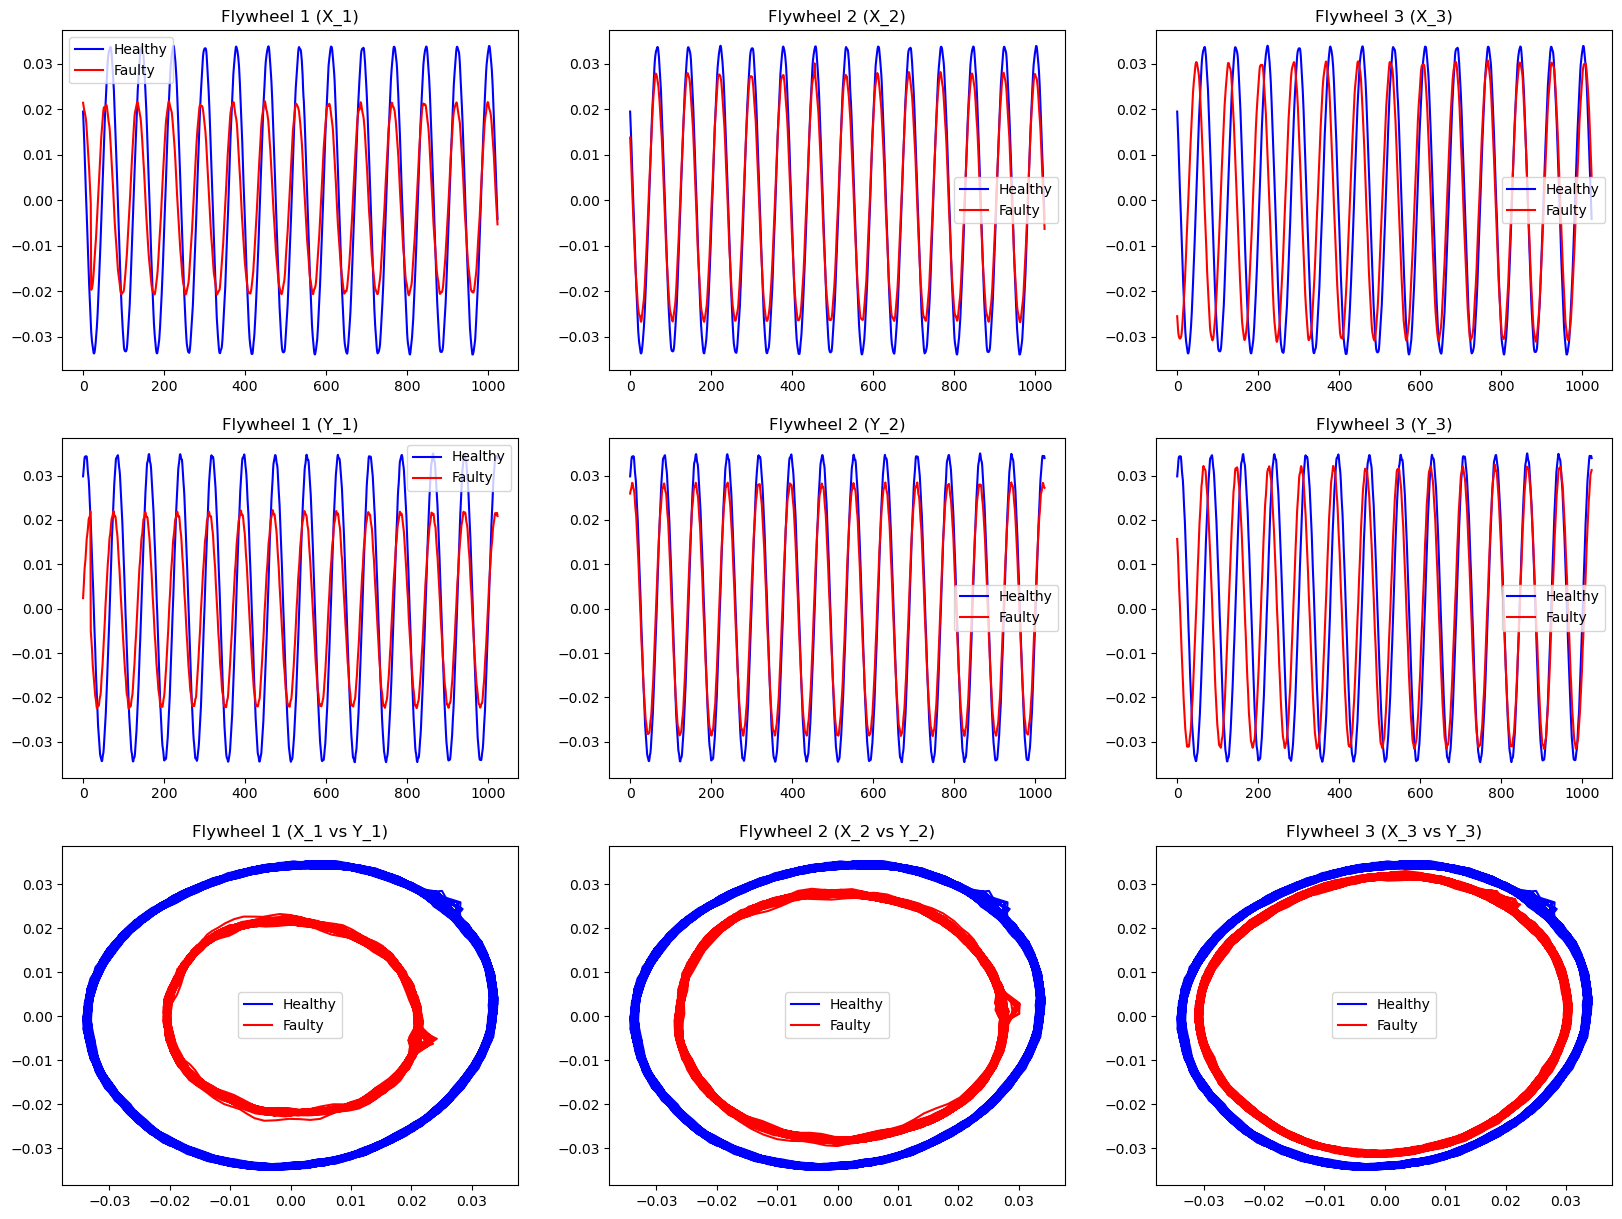

In [8]:
dfs = [(df1, df2), (df1, df3), (df1, df4)]
signals = [("X_1", "Y_1")]
fig, axis = plt.subplots(3,3, figsize=(20,15))
for i in range(3):
    axis[0,i].plot(dfs[i][0]['X_1 (Mean)'][:1024], 'b')
    axis[0,i].plot(remove_phase(dfs[i][0]['X_1 (Mean)'][:2024], dfs[i][1]['X_1 (Mean)'][:2024])[:1024], 'r')
    axis[1,i].plot(dfs[i][0]['Y_1 (Mean)'][:1024], 'b')
    axis[1,i].plot(remove_phase(dfs[i][0]['Y_1 (Mean)'][:2024], dfs[i][1]['Y_1 (Mean)'][:2024])[:1024], 'r')
    axis[2,i].plot(dfs[i][0]['X_1 (Mean)'], dfs[i][0]['Y_1 (Mean)'], 'b')
    axis[2,i].plot(dfs[i][1]['X_1 (Mean)'], dfs[i][1]['Y_1 (Mean)'], 'r')
    axis[0,i].legend(["Healthy", "Faulty"])
    axis[1,i].legend(["Healthy", "Faulty"])
    axis[2,i].legend(["Healthy", "Faulty"])
    axis[0,i].set_title(f"Flywheel {i+1} (X_{i+1})")
    axis[1,i].set_title(f"Flywheel {i+1} (Y_{i+1})")
    axis[2,i].set_title(f"Flywheel {i+1} (X_{i+1} vs Y_{i+1})")
